
# DataCite DOI Creator and Updater - How to Use

**Author: Zach Boquet**

## Introduction

This python script provides a method to generate new or update existing DataCite DOI metadata records for their associated SPASE metadata records. This notebook walks you through this process, step-by-step. <br>

First, the script asks you for your repository's DataCite login credentials, so have this ready. Next, SPASE metadata is extracted from XML files using lxml. After this extraction, this metadata is formatted according to DataCite's metadata schema in the form of a JSON file, and the option is given to the user to create a draft or publish this new metadata record on DataCite. If the user does not publish, a draft metadata record is saved locally in a directory called SPASE_JSONs for viewing. <br>

**Note that publishing to DataCite is irreversable. Because of this, it is recommended that you create drafts first, and then rerun the script afterwards to publish them once you have checked the draft JSON for correctness.**<br>

- The tutorial I used to implement lxml is <a href = "https://lxml.de/tutorial.html" target="_blank">https://lxml.de/tutorial.html</a>.
- DataCite's official metadata schema used for this script is <a href = "https://doi.org/10.14454/mzv1-5b55" target="_blank">https://doi.org/10.14454/mzv1-5b55</a>.
- The documentation for DataCite's REST API used in this script to create/update DataCite metadata records is <a href = "https://support.datacite.org/docs/api" target="_blank">https://support.datacite.org/docs/api</a>.<br>

*Note that this code was extensively tested on the NASA SPASE Github repo, specifically the NumericalData and DisplayData directories. While we encourage the use of this script on other SPASE Github repos, this may require extra tinkering in order to fit your community/agency's desired formatting and/or other guidelines.*


## Overview of the Creation/Update Process

The stages of the script are as follows:
1. Asks user for their repository's account credentials which are needed to add/update metadata records on DataCite.

2. Checks the SPASE record provided for a DOI. If none found, a call to the DataCite REST API is made to check and see if a draft metadata record has already been made for this record. If either of these steps is successful, then the DOI and publication year are scraped, in addition to the rest of the metadata extracted in the next step.

3. Scrape the given SPASE record(s) using lxml and following specific logic as designed by the SPASE-DataCite Mapping Working Group. At minimum, the metadata needed to mint a DOI is extracted from the SPASE record(s). If available, additional metadata is extracted which helps improve the richness of the DataCite record.

4. This extracted metadata is then formatted according to DataCite's most recent schema as of the release of this script. This formatted metadata is saved in the local directory, SPASE_JSONs, as JSON files with the file path mirroring the path found in the ResourceID.

5. The script then asks the user whether or not they wish to publish the newly created/updated JSON(s) to their repository's DataCite account. If so, the draft is deleted from SPASE_JSONs. If not, these are left in draft state and remain saved in SPASE_JSONs. **Note that publishing cannot be undone.**

This process is more easily understood as a structure chart shown below:

![SPASE-DataCite Mapping Behavior-2.jpg](<attachment:SPASE-DataCite Mapping Behavior-2.jpg>)
*Note that this process occurs for each SPASE record found in the folder/list of ResourceID(s) given by the user.*
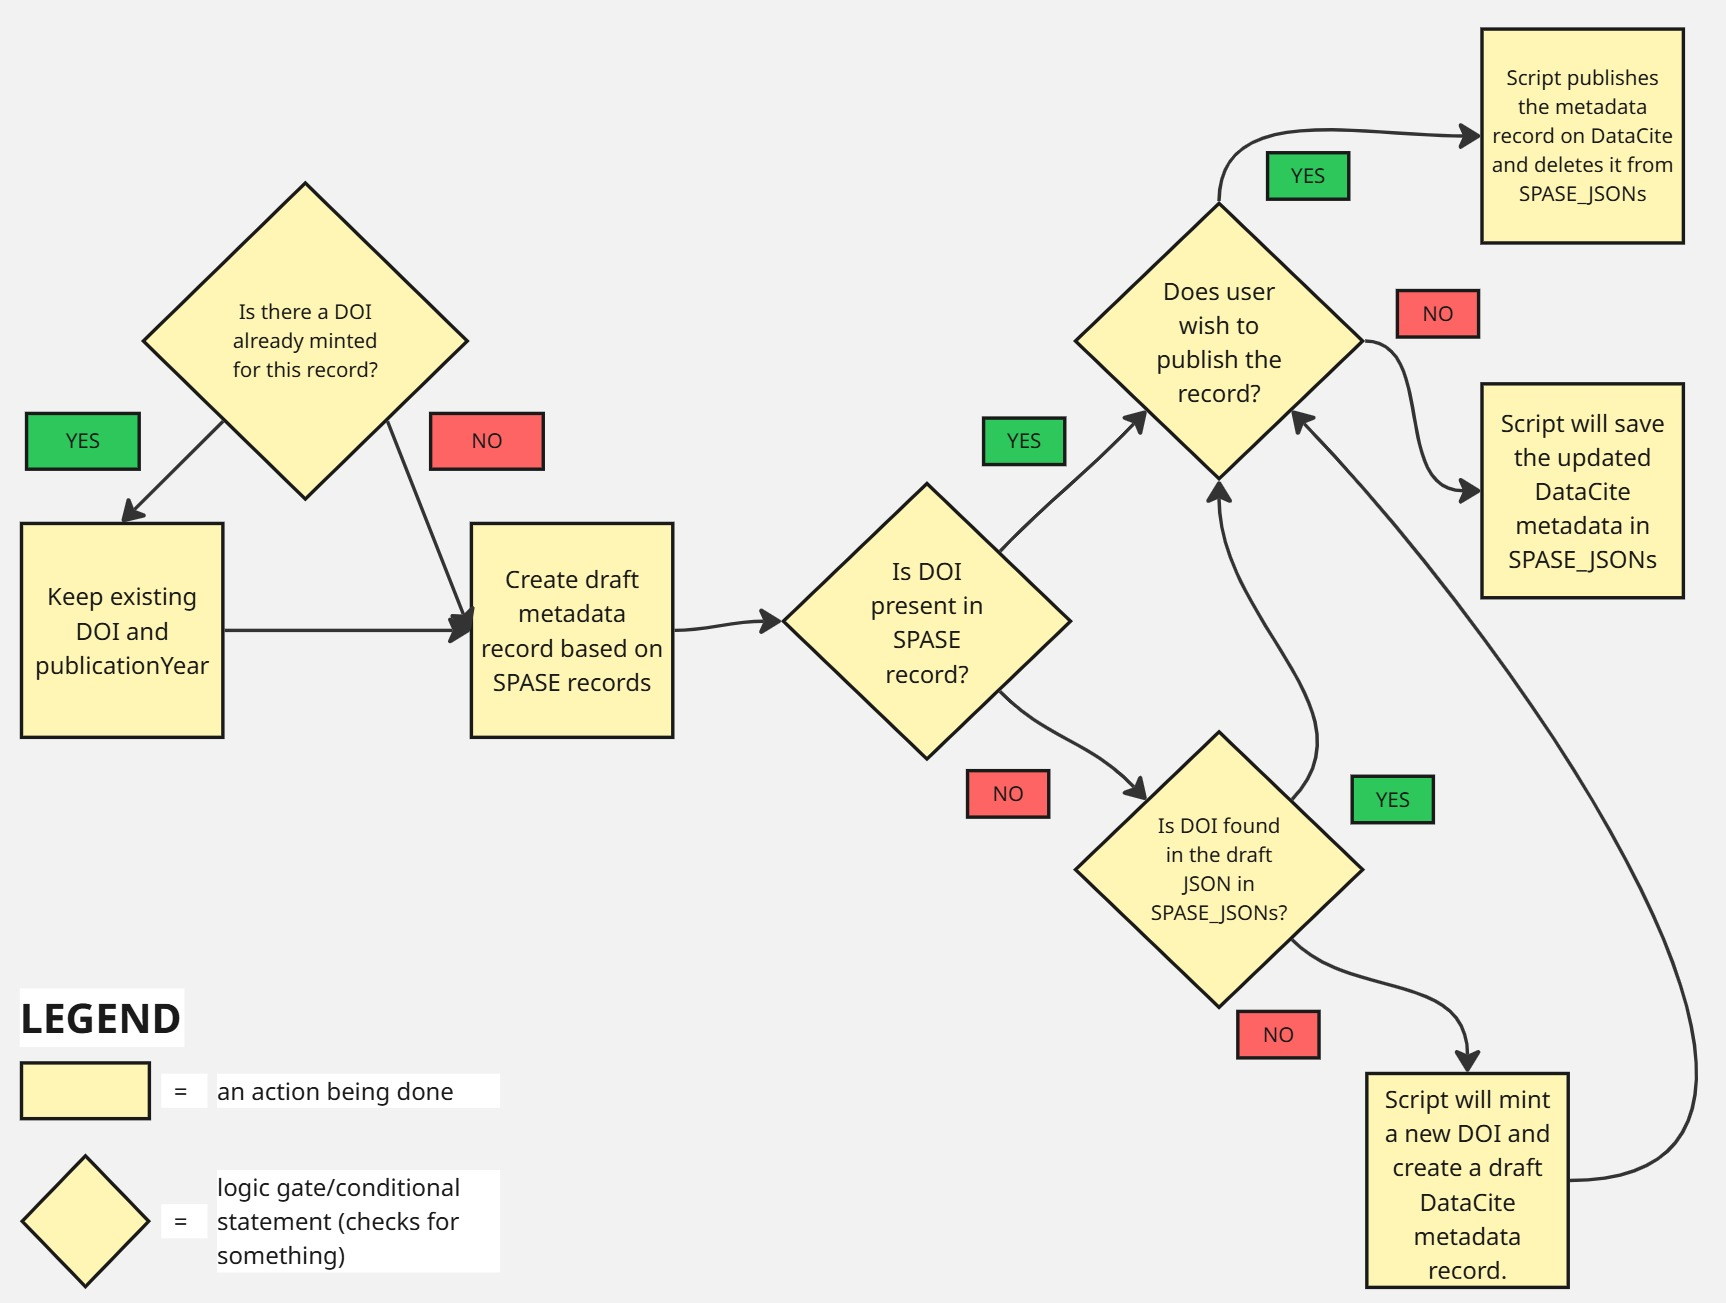


## Installation

>**For Non-HelioCloud users**: If you do not already have Python installed, you can download your specific OS' version at https://www.python.org/downloads/. To make your life easier: During the installation process, ensure that the *"Add Python to PATH"* option is enabled.

First, ensure you have cloned the <a href="https://github.com/Kurokio/SPASE-DataCite/tree/main" target="_blank">SPASE-DataCite</a> repo from which this notebook was pulled from. Please see the README file there for additional details, or follow along below.

In order to clone this repository, you first need to open the terminal. Follow the below instructions for your particular os/environment.

### Run your OS' terminal/command line.

- For Windows: Search and open "Windows Powershell", "Command Prompt", or simply "Terminal".

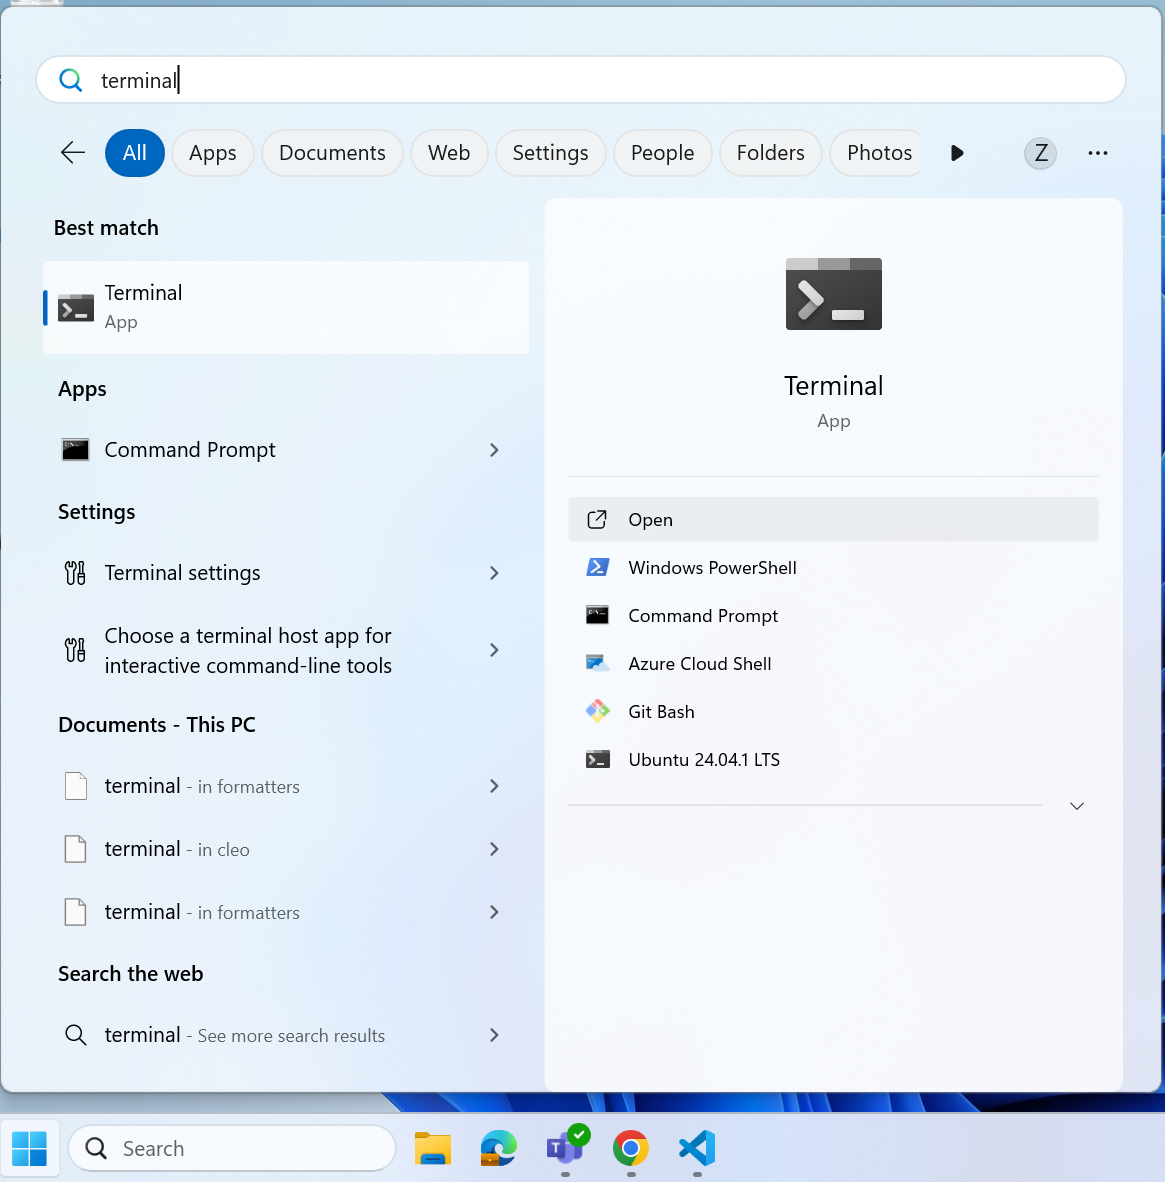

- For MacOS/Linux: Search and open "Terminal".

- For HelioCloud users: You may already have a terminal waiting for you when first opened. If not, from the Launcher screen, click "Terminal" under the "Other" tab, as shown in the screenshot below.

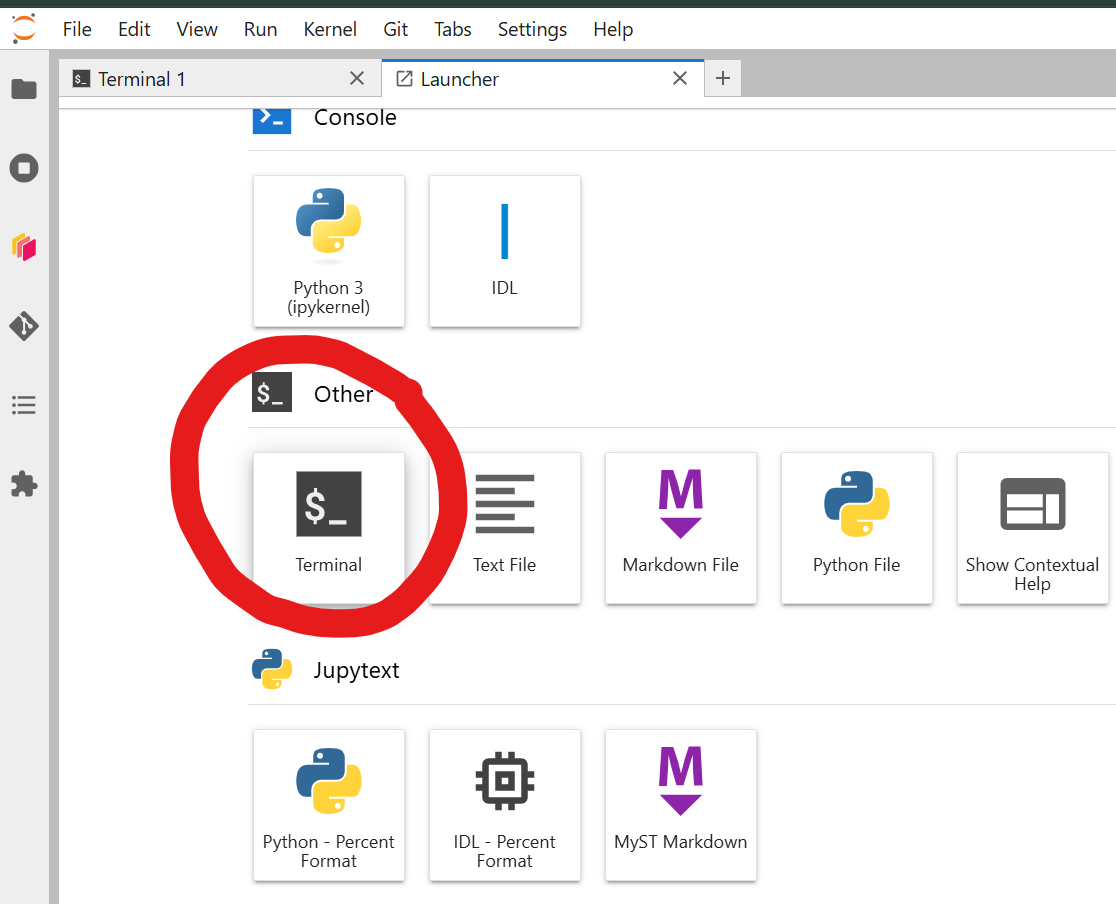

Next, in order to clone the SPASE Github Repository(s) you wish to create/update DataCite DOI records for in your HOME directory, you first need to know what your home directory is. Run the following Jupyter notebook cell to find out by clicking the play button on the top left.

In [ ]:
import sys, subprocess
# set your homeDir
if sys.platform.startswith('win'):
    result = subprocess.run('echo %USERPROFILE%', shell=True, capture_output=True, text=True, 
                            check=True)
    homeDir = result.stdout.replace("\\", "/").strip()
elif sys.platform.startswith('linux'):
    result = subprocess.run('echo $HOME', shell=True, capture_output=True, text=True, check=True)
    homeDir = result.stdout.strip()
print("Your home directory is " + homeDir)

Now that you know your home directory, run this cell to clone the SPASE Github repo of your choice. 
* The complete list of SPASE records hosted on Github are found at <a href = "https://github.com/hpde" target="_blank">https://github.com/hpde</a>.

*Note that the default command below is for the NASA SPASE repo. Also included is the code needed to clone the SMWG repository as well, which contains additional SPASE records linked (such as instruments, observatories, people, etc.). To clone a different SPASE repo, replace the NASA in "https://github.com/hpde/NASA" with the repo you want. You should also replace the NASA text after this link with the name of the new repo. (i.e. https://github.com/hpde/ESA ESA) for the ESA SPASE repo. You will likely need the SMWG repo regardless of which SPASE repo you choose, so leave that unchanged.*

In [ ]:
# Default: command to clone the NASA SPASE Github Repo into your home directory.
# refer to the instructions for cloning your community's SPASE repo on 
#   https://github.com/hpde/<your community/agency>
command = f"git clone -b master --single-branch --depth=1 https://github.com/hpde/NASA NASA"
result = subprocess.run(command, shell=True, capture_output=True, text=True, check=True, cwd=homeDir)
print(result.stderr)
print("Done")

# command to clone the SMWG SPASE Github Repo in your home directory. LEAVE THIS UNCHANGED.
command = f"git clone -b master --single-branch --depth=1 https://github.com/hpde/SMWG SMWG"
result = subprocess.run(command, shell=True, capture_output=True, text=True, check=True, cwd=homeDir)
print(result.stderr)
print("Done")

Now we can go ahead and clone the SPASE-DataCite repo if you don't have it already by executing the following Python code.

In [ ]:
# command to clone the SPASE-DataCite repo in your HOME directory
command = f"git clone https://github.com/Kurokio/SPASE-DataCite.git"
result = subprocess.run(command, shell=True, capture_output=True, text=True, check=True, cwd=homeDir)
print(result.stderr)
print("Done")

Next, in the terminal, navigate to the folder/directory containing the SPASE-DataCite repo you cloned earlier, if you are not there already. To change your working/current directory to the folder containing this project, execute the following command in your terminal, swapping out *<path_to_SPASE-DataCite>* for the actual path: `cd <path_to_SPASE-DataCite>`. My repo is in my home directory in a folder called 'Dev', as shown in the screenshot below.<br>

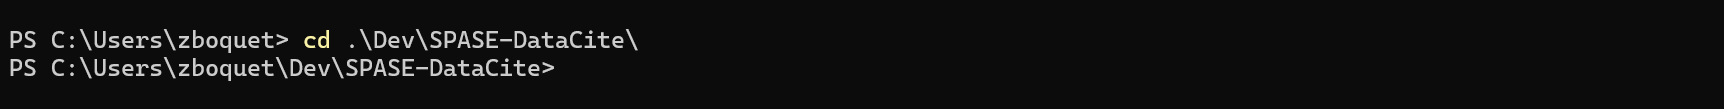

*The '.' symbol just represents your home directory in the terminal, so you don't have to type it out everytime.*

Lastly, make sure you have the necessary python packages detailed in requirements.txt installed by running this terminal command: `pip install -r ./requirements.txt`.


## Executing the script

Regardless of whether you are creating new DataCite metadata records or updating existing ones, the command to run the script remains the same. The only difference is your use case. The command differs between whether you want the script to work on: 
* A entire folder (or file) of SPASE records (an entire repository or specific directory in that repository)
* OR a specific SPASE record file (or list of record files) as a string

> **For Non-HelioCloud users:** If you did not ensure that python was added to your path during installation as discussed earlier, you will have to provide the full path to your *python.exe* file instead of 'python' in the following commands.

The basic blueprint for the command is `python ./DOI_Creation.py <folder> <IDsProvided>`<br>

Another explanation of the main function, which details what 'folder' and 'IDsProvided' should be, can be given by executing the following command: `python ./DOI_Creation.py --help`, or run the following Python code.

In [ ]:
# command to printout the docstring for main DOI_Creation script
command = f"python ./DOI_Creation.py --help"
result = subprocess.run(command, shell=True, capture_output=True, text=True, check=True, cwd=f"{homeDir}/SPASE-DataCite")
print(result.stdout)
print("Done")

You are now ready to run the script following the command instructions for whichever use case you have. An example of each use case's commands (with screenshots) is given below.

#### If running on a folder/file of SPASE records

This use case is for users who want to create/update DataCite metadata for all SPASE records found in a given folder or text file. For this use case, the last argument you give must be 'False'. The command would look something like: `python ./DOI_Creation.py <path to repo_folder/txt_file> False`.<br>

For example, the command to update the DataCite metadata record for the folder containing the 'Gold standard' (well-populated) SPASE record can be run on a terminal by executing the command shown above with **C:/Users/\<username>/NASA/NumericalData/MMS/4/HotPlasmaCompositionAnalyzer/Burst/Level2/Ion** as the value for the `<path_to_repo_folder>`. Screenshots of how it should look are shown below:

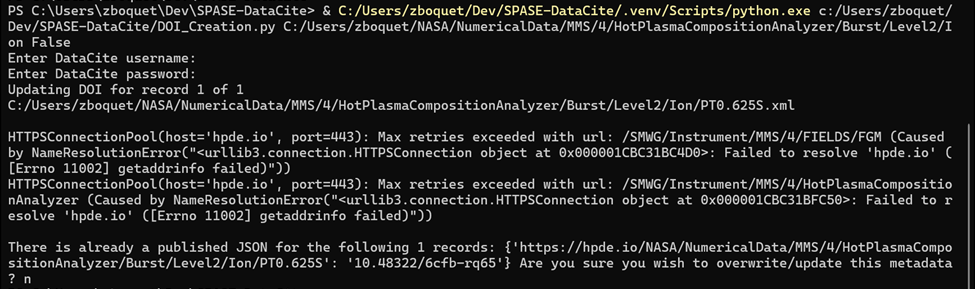

*Note that if passing a text file, this file must contain all the ResourceIDs you wish to create/update DOIs for, and only one for each line.*


#### If running on specific SPASE record file(s)

This use case is for users who may have a list of a few SPASE records they wish to create/update DataCite metadata for but do not wish to create a text file. This case also applies if you only have one SPASE record.<br>

For this use case, the last argument you give must be 'True', and you must provide the ResourceID(s) for the SPASE record(s) as an argument to the command. If you do have multiple records, the ResourceIDs must be comma-separated and must all be surrounded by one pair of quotes. The command would look something like `python ./DOI_Creation.py "ResourceID_1, ResourceID2, ..., ResourceID_n" True`.<br>

For example, the command to update the DataCite metadata record for 2 SPASE records would look something like the screenshot below:

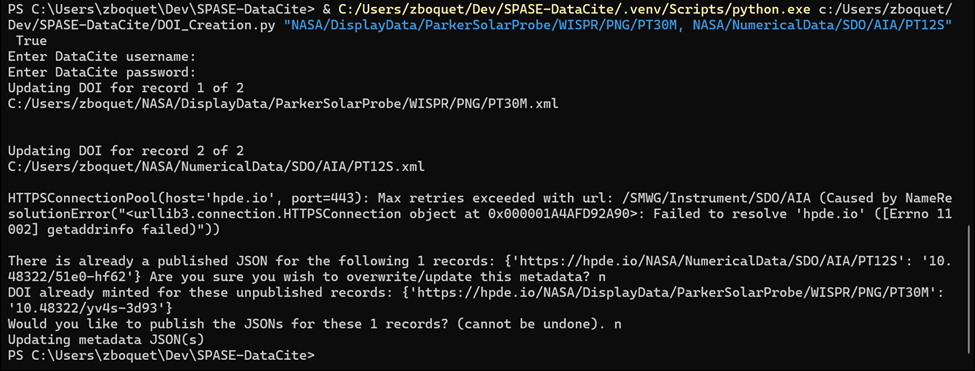

Notice that the script has different printouts. This is because it categorizes all records into 3 categories (as shown in the structure chart earlier):
* records which have DOI in the SPASE record (already published on DataCite)
* records which have a draft record on DataCite (with a minted DOI) which is not published yet (DOI is only found in SPASE_JSONs, not in actual SPASE record xml)
* records which are brand new to DataCite<br>

For each of these categories, the script will ask you whether or not you wish to publish them (and provide the DOIs for each that belong in that category). If you answer 'yes' for any of these categories, then all of the SPASE records you provided which belong in that category will have their DOI records published. **Remember that publishing to DataCite is irreversible!**

## Final Words

With that, you are now prepared to update/create DataCite DOI metadata records for your SPASE records! If you run into any problems, please do not hesitate to create a new issue on the SPASE-DataCite Mapping Github page, found at <a href="https://github.com/Kurokio/SPASE-DataCite/tree/main" target="_blank">https://github.com/Kurokio/SPASE-DataCite/tree/main</a>.